# Exploring the Data Analyst Job Market in Morocco: A Comprehensive Analysis


## Introduction

This Jupyter Notebook project aims to explore and analyze the job market for data analysts in Morocco, focusing on data collected from the popular job platform Indeed. The project is divided into two main sections.



### Section 1: Data Scraping from Indeed

The first section of the project focuses on scraping data from the Indeed website to gather information about data analyst job postings in Morocco. Please note that the current data presented in this notebook represents a previous scraping attempt, as the scraping tool's access has been exhausted.


##### Job Data Collection and Description Parsing

The initial phase of the data collection process involved scraping job listings from the Indeed website, focusing on data analyst positions available in the Moroccan job market. The Python `zenrows` library was utilized to fetch the job search results, and the BeautifulSoup library was employed to parse the HTML content.

In [21]:
from bs4 import BeautifulSoup
import pandas as pd
from zenrows import ZenRowsClient

In [23]:
def page(num):
    url=f'https://ma.indeed.com/jobs?q=data+analyst&l=Maroc&start={(num)*10}'
    client = ZenRowsClient("8726814efae5c7b6d9aa19e34c3a7496dbd484b7")
    result = client.get(url)
    print(result.status_code)
    return result.text

In [ ]:
page(0)

In [26]:
job_titles=[]
link=[]
company_name=[]
location=[]
job_type=[]
description=[]




for i in range(11):
    soup=BeautifulSoup(page(i), 'html')
    job_tags=soup.find_all('a', class_="jcs-JobTitle css-jspxzf eu4oa1w0")
    for j in range (len(job_tags)):
        job_titles.append(job_tags[j].text)
    for m in range(len(job_tags)):
        link.append('https://ma.indeed.com' +job_tags[m].get('href'))  
    tags=soup.find_all('div', class_="company_location css-12lvszk e37uo190")
    company=[tag.find('span', class_="css-1x7z1ps eu4oa1w0") for tag in tags]
    for i in range(len(company)):
        if company[i]== None:
            company_name.append('None')
        else:    
            company_name.append(company[i].text)  
    loc=[tag.find('div', class_="css-t4u72d eu4oa1w0") for tag in tags]

    for i in range(len(loc)):
        if loc[i]== None:
           location.append('None')
        else:    
            location.append(loc[i].text)  
    ka=soup.find_all('div', class_="slider_container css-8xisqv eu4oa1w0")
    ba=[k.find('div', class_="css-1ihavw2 eu4oa1w0") for k in ka]
    for i in range(len(ka)):
        if ba[i]== None:
           job_type.append('None')
        else:
           job_type.append(ba[i].text) 
    snippet=soup.find_all('div', class_="job-snippet")
    for n in snippet:
        description.append(n.text.strip().replace('\n', '-'))

200
200
200
200
200
200
200
200
200
200
200


In [28]:
len(job_titles)

158

In [35]:
link[0]

'https://ma.indeed.com/rc/clk?jk=9199992ed81408bd&fccid=cf80abde47d3bd81&vjs=3'

In [30]:
len(description)

158

In [31]:
len(job_type)

158

In [34]:
dic={'job': job_titles,
     'company_name': company_name,
     'location': location,
     'job_type' : job_type,
     'description': description,
     'link': link,
    'date':['28/10/2023']*158}
df=pd.DataFrame(dic)
df.head(8)

,job,company_name,location,job_type,description,link,date
0,Data Analyst Junior,Mazars,Casablanca,Full-time +1,Vous possédez les connaissances de base parmi ...,https://ma.indeed.com/rc/clk?jk=9199992ed81408...,28/10/2023
1,DATA ANALYST-(H/F)- H/F/X,Société Générale,Maroc,Permanent,Travailler en étroite collaboration avec les é...,https://ma.indeed.com/rc/clk?jk=b4badc2d01fa4b...,28/10/2023
2,Data analyst,FCZ,Rabat,None,Nous sommes à la recherche de cinq DATA ANALYS...,https://ma.indeed.com/rc/clk?jk=3c1075a23ed816...,28/10/2023
3,Data Analyst (F/H),MANPOWER MAROC,Casablanca,Permanent,Encodage de questionnaire sur logiciel de trai...,https://ma.indeed.com/rc/clk?jk=be7b7dabde0a25...,28/10/2023
4,Data Quality Analyst Finance,BNP Paribas,Maroc,Permanent,Data management: recensement des anomalies de ...,https://ma.indeed.com/rc/clk?jk=17240d557883f2...,28/10/2023
5,DATA ANALYST (H/F),Ifcar Solutions,Skhirate,Permanent,Analyse des données pour les transformer en in...,https://ma.indeed.com/rc/clk?jk=1753c98e22bff0...,28/10/2023
6,Data Analyst,Leyton Maroc,Casablanca,None,Experience with data cleaning and data preproc...,https://ma.indeed.com/rc/clk?jk=f9b50f1f820586...,28/10/2023
7,Data analyst,None,Rabat,Permanent,"Le Data Analyst sera chargé de collecter, form...",https://ma.indeed.com/rc/clk?jk=074498c4725e92...,28/10/2023


In [36]:
df.to_csv('indeed_jobs3.csv', index=False)

##### Detailed Job Description Extraction

Upon obtaining the basic job information such as titles and companies, the data scraping process was extended to extract the full job descriptions from the individual job links. By parsing the HTML structure of the job description pages, we were able to retrieve comprehensive details about the responsibilities, qualifications, and required skills for each job posting.


In [38]:
def get_page(site):

    client = ZenRowsClient("8726814efae5c7b6d9aa19e34c3a7496dbd484b7")
    result = client.get(site)
    return result.text

In [ ]:
competences=[]
for site in df['link']:
    s=BeautifulSoup(get_page(site), 'html')
    elements=s.find_all('div', class_="jobsearch-jobDescriptionText jobsearch-JobComponent-description css-1x2lix0 eu4oa1w0")
    skills=[]
    for l in elements:
        liste=l.find_all('li')
        for l in liste:
            skills.append(l.text)
    competences.append(skills)
competences   

In [40]:
len(competences)

158

##### Skill Identification and Analysis

The extracted job descriptions were processed using natural language processing techniques to identify and analyze the most frequently mentioned skills and qualifications. This facilitated the exploration of the key technologies and proficiencies sought after by employers in the field of data analysis in Morocco.

Please proceed to the subsequent sections for a detailed examination of the skills and qualifications demanded by employers, along with insights into the trends and patterns observed in the job market for data analysts in Morocco.

In [41]:
import re
search_programing = ['Python', 'R', 'SQL', 'Java', 'SAS', 'C++', 'C#', 'PHP']
pattern = '|'.join(map(re.escape, search_programing))  # Escape the special characters
skwils=[]
for c in competences:
    lama=[]
    for string in c:

# Find all occurrences of the pattern in the string
        matches = re.finditer(pattern, string)

# Extract the matched terms
        lama.extend([match.group(0) for match in matches])

    skwils.append(lama)    


In [ ]:
skwils

In [52]:
search_tools = ['Microsoft Excel','Google Sheets','Pandas','NumPy','dplyr']
base_tools = ['MySQL','PostgreSQL','Microsoft SQL Server','Oracle','MongoDB']
vis_tools = ['Tableau','Power BI','QlikView','matplotlib','Seaborn']
search_programing = ['Python', 'R', 'SQL', 'Java', 'SAS', 'C++', 'C#', 'PHP']
pattern = '|'.join(map(re.escape, search_programing))
pattern1 = '|'.join(map(re.escape, search_tools))
pattern2 = '|'.join(map(re.escape, vis_tools))
pattern3 = '|'.join(map(re.escape, base_tools))  # Escape the special characters
programming_language=[]
manipulation=[]
visual=[]
bdd=[]
for c in competences:
    lama=[]
    alpha=[]
    beta=[]
    gama=[]
    for string in c:

# Find all occurrences of the pattern in the string
        matches = re.finditer(pattern, string)
        matches1 = re.finditer(pattern1, string)
        matches2 = re.finditer(pattern2, string)
        matches3 = re.finditer(pattern3, string)

# Extract the matched terms
        lama.extend([match.group(0) for match in matches])
        alpha.extend([match.group(0) for match in matches1])
        beta.extend([match.group(0) for match in matches2])
        gama.extend([match.group(0) for match in matches3])
    programming_language.append(lama)
    manipulation.append(alpha)
    visual.append(beta)
    bdd.append(gama)    


In [ ]:
programming_language

In [61]:
dic1={'programming_language': programming_language,
      'data-manipulation': manipulation,
      'data-visualisation': visual,
      'database': bdd
      }
df1=pd.DataFrame(dic1)
df1

,programming_language,data-manipulation,data-visualisation,database
0,[SQL],[],[Tableau],[]
1,"[R, Python]",[],[Power BI],[]
2,[R],[],[],[]
3,"[R, R, R, R]",[],[],[]
4,"[R, R, R, R, R]",[],[Tableau],[Oracle]
...,...,...,...,...
153,"[R, R, SQL, R, SQL, SQL, R, R, SQL, SQL, SQL, ...",[],[Power BI],"[Microsoft SQL Server, Oracle, Oracle, MongoDB]"
154,[R],[],[],[]
155,[R],[],[],[]
156,[],[],[],[]


### Section 2: Data Cleaning and Visualization

The second section involves data cleaning and visualization. Even though the data scraping cannot be repeated in this notebook, the subsequent data cleaning and visualization sections showcase the steps involved in preparing and analyzing the obtained data.

The primary goal of this project is to provide insights into the requirements and trends in the data analyst job market in Morocco, highlighting the key skills and technologies in demand. Throughout the notebook, detailed explanations and visual representations are provided to facilitate understanding and interpretation of the data.

Please refer to the subsequent sections for a comprehensive exploration of the collected data and the findings derived from the analysis.

---


#### Data Cleaning and Preparation

Following the initial data scraping process, the obtained data underwent thorough cleaning and preparation. This involved handling missing values, standardizing data formats, and converting relevant features into appropriate data types for analysis. The cleaned data was then organized and structured for further exploration and visualization.


In [62]:
df2=df1.copy

The code snippet below is used to remove brackets from each row within the specified lists ('visual', 'programming_language', 'manipulation', and 'bdd'). It converts each sublist into a string format and joins the elements within the sublist using a comma, resulting in a clean and formatted representation of the data.

In [71]:
cleaned_vis = [', '.join(filter(None, sublist)) for sublist in visual]
cleaned_pro= [', '.join(filter(None, sublist)) for sublist in programming_language]
cleaned_man= [', '.join(filter(None, sublist)) for sublist in manipulation]
cleaned_bdd= [', '.join(filter(None, sublist)) for sublist in bdd]




In [72]:
dic3={'programming_language': cleaned_pro,
      'data-manipulation': cleaned_man,
      'data-visualisation': cleaned_vis,
      'database': cleaned_bdd
      }
df3=pd.DataFrame(dic3)

In [90]:
df3.head(10)

,programming_language,data-manipulation,data-visualisation,database
0,SQL,,Tableau,
1,"R, Python",,Power BI,
2,R,,,
3,"R, R, R, R",,,
4,"R, R, R, R, R",,Tableau,Oracle
5,,,,
6,"SQL, Python","Microsoft Excel, Microsoft Excel","Tableau, Power BI",
7,R,,,
8,,,,
9,"R, R",,,


In [92]:
df4=df3.copy()

The `remove_duplicates` function is designed to eliminate duplicate elements from a string while preserving the original element order. It takes a string as input, splits the elements based on the delimiter ', ', and returns a new string with duplicate elements removed.


In [96]:
def remove_duplicates(s):
    if s.strip():  # Check if the string is not empty or consists of only whitespace
        elements = s.split(', ')
        unique_elements = []
        for element in elements:
            if element and element not in unique_elements:  # Check if the element is not empty
                unique_elements.append(element)
        return ', '.join(unique_elements)
    else:
        return ''

# Apply the customthe 'programming_language' column
 df4['programming_language'] = df4['programming_language'].apply(remove_duplicates)

In [98]:
df4['data-manipulation'] = df4['data-manipulation'].apply(remove_duplicates)

In [99]:
df4['data-visualisation'] = df4['data-visualisation'].apply(remove_duplicates)

In [100]:
df4['database'] = df4['database'].apply(remove_duplicates)

In [101]:
df4

,programming_language,data-manipulation,data-visualisation,database
0,SQL,,Tableau,
1,"R, Python",,Power BI,
2,R,,,
3,R,,,
4,R,,Tableau,Oracle
...,...,...,...,...
153,"R, SQL, SAS, C#",,Power BI,"Microsoft SQL Server, Oracle, MongoDB"
154,R,,,
155,R,,,
156,,,,


In [102]:
niv = ['bac+2','BAC+2','bac+3','BAC+3','bac+5','BAC+5','licence','master','LICENCE','MASTER']
pattern = '|'.join(map(re.escape, niv)) # Escape the special characters
degree=[]
for c in competences:
    lama=[]
    for string in c:

# Find all occurrences of the pattern in the string
        matches = re.finditer(pattern, string)

# Extract the matched terms
        lama.extend([match.group(0) for match in matches])

    degree.append(lama)

In [104]:
len(degree)

158

In [105]:
cleaned_degree= [', '.join(filter(None, sublist)) for sublist in degree]

In [107]:
df4['degree']=cleaned_degree

In [108]:
df4

,programming_language,data-manipulation,data-visualisation,database,degree
0,SQL,,Tableau,,
1,"R, Python",,Power BI,,
2,R,,,,BAC+3
3,R,,,,
4,R,,Tableau,Oracle,
...,...,...,...,...,...
153,"R, SQL, SAS, C#",,Power BI,"Microsoft SQL Server, Oracle, MongoDB",master
154,R,,,,master
155,R,,,,
156,,,,,


In [109]:
df4['degree'] = df4['degree'].apply(remove_duplicates)

In [112]:
df4

,programming_language,data-manipulation,data-visualisation,database,degree
0,SQL,,Tableau,,
1,"R, Python",,Power BI,,
2,R,,,,BAC+3
3,R,,,,
4,R,,Tableau,Oracle,
...,...,...,...,...,...
153,"R, SQL, SAS, C#",,Power BI,"Microsoft SQL Server, Oracle, MongoDB",master
154,R,,,,master
155,R,,,,
156,,,,,


In [114]:
df4['degree'] = df4['degree'].str.replace('master', 'BAC+5')


In [115]:
df4

,programming_language,data-manipulation,data-visualisation,database,degree
0,SQL,,Tableau,,
1,"R, Python",,Power BI,,
2,R,,,,BAC+3
3,R,,,,
4,R,,Tableau,Oracle,
...,...,...,...,...,...
153,"R, SQL, SAS, C#",,Power BI,"Microsoft SQL Server, Oracle, MongoDB",BAC+5
154,R,,,,BAC+5
155,R,,,,
156,,,,,


In [116]:
df5=df.join(df4)

In [118]:
df5.to_csv('data-analyst-jobs_database.csv', index=False)

#### Visualizations and Insights

Utilizing the cleaned dataset, various visualizations were created to uncover valuable insights into the data analyst job market in Morocco. The visual representations include e charts, graphs, which provide a comprehensive overview of the key trends, patterns, and requirements observed within the job postings.

Insights derived from the visualizations shed light on the most in-demand programming languages, data manipulation techniques, data visualization tools, and database technologies sought after by employers in the field of data analysis. The findings offer a nuanced understanding of the skill sets and proficiencies that are essential for aspiring data analysts seeking employment opportunities in Morocco.

Please refer to the subsequent sections for a detailed analysis of the visualizations and the key takeaways derived from the exploration of the data analyst job market in Morocco.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('data-analyst-jobs_database.csv')

In [8]:
df1=df.copy()

In [9]:
df1.columns= pd.MultiIndex.from_tuples([('job card', 'job'), ('job card', 'company_name'), ('job card', 'location'),('job card', 'job_type'), ('job card', 'description'), ('job card', 'link'), ('job card', 'date'), ('required-skills','programming_language'), ('required-skills','data-manipulation'), ('required-skills','data-visualisation	'), ('required-skills','database'), ('required-skills','degree')])

In [10]:
df1.head()

job card                                              \
                            job      company_name    location      job_type   
0           Data Analyst Junior            Mazars  Casablanca  Full-time +1   
1     DATA ANALYST-(H/F)- H/F/X  Société Générale       Maroc     Permanent   
2                  Data analyst               FCZ       Rabat           NaN   
3            Data Analyst (F/H)    MANPOWER MAROC  Casablanca     Permanent   
4  Data Quality Analyst Finance       BNP Paribas       Maroc     Permanent   

                                                      \
                                         description   
0  Vous possédez les connaissances de base parmi ...   
1  Travailler en étroite collaboration avec les é...   
2  Nous sommes à la recherche de cinq DATA ANALYS...   
3  Encodage de questionnaire sur logiciel de trai...   
4  Data management: recensement des anomalies de ...   

                                                                  \
                                                link        date   
0  https://ma.indeed.com/rc/clk?jk=9199992ed81408...  28/10/2023   
1  https://ma.indeed.com/rc/clk?jk=b4badc2d01fa4b...  28/10/2023   
2  https://ma.indeed.com/rc/clk?jk=3c1075a23ed816...  28/10/2023   
3  https://ma.indeed.com/rc/clk?jk=be7b7dabde0a25...  28/10/2023   
4  https://ma.indeed.com/rc/clk?jk=17240d557883f2...  28/10/2023   

       required-skills                                                         
  programming_language data-manipulation data-visualisation\t database degree  
0                  SQL               NaN              Tableau      NaN    NaN  
1            R, Python               NaN             Power BI      NaN    NaN  
2                    R               NaN                  NaN      NaN  BAC+3  
3                    R               NaN                  NaN      NaN    NaN  
4                    R               NaN              Tableau   Oracle    NaN

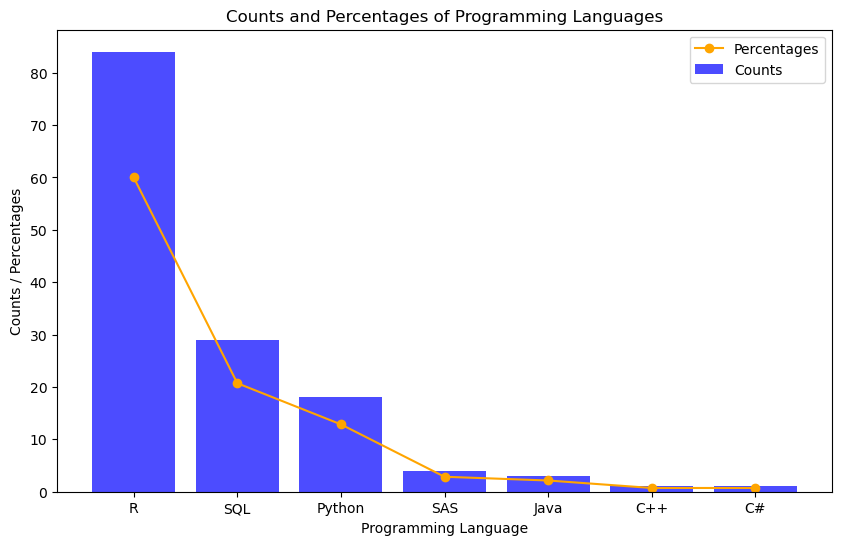

In [11]:
language_counts = df1['required-skills']['programming_language'].str.split(', ', expand=True).stack().value_counts()
total_values = language_counts.sum()
percentages = language_counts / total_values * 100

# Plot the percentages and counts for each programming language
plt.figure(figsize=(10, 6))
plt.bar(language_counts.index, language_counts, color='blue', alpha=0.7, label='Counts')
plt.plot(percentages.index, percentages, color='orange', marker='o', label='Percentages')
plt.xlabel('Programming Language')
plt.ylabel('Counts / Percentages')
plt.title('Counts and Percentages of Programming Languages')
plt.legend()
plt.show()

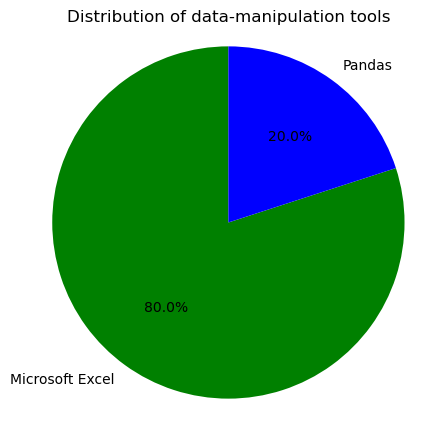

In [14]:
manipulation_counts = df1['required-skills']['data-manipulation'].str.split(', ', expand=True).stack().value_counts()
total_values = manipulation_counts.sum()
percentages = manipulation_counts / total_values * 100

# piechart the percentages  for each data-manipulation tool
plt.figure(figsize=(5, 5))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=['green','blue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of data-manipulation tools')
plt.show()

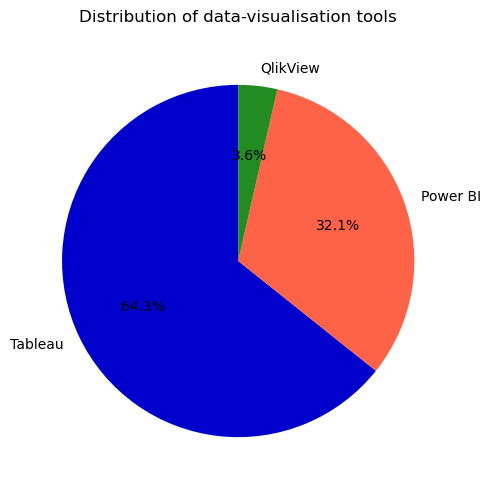

In [13]:
vis_counts = df1['required-skills']['data-visualisation	'].str.split(', ', expand=True).stack().value_counts()
total_values = vis_counts.sum()
percentages = vis_counts / total_values * 100
# Plot the percentages and counts for each data-visualisation tools
plt.figure(figsize=(5, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=['mediumblue', 'tomato','forestgreen'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of data-visualisation tools')
plt.show()

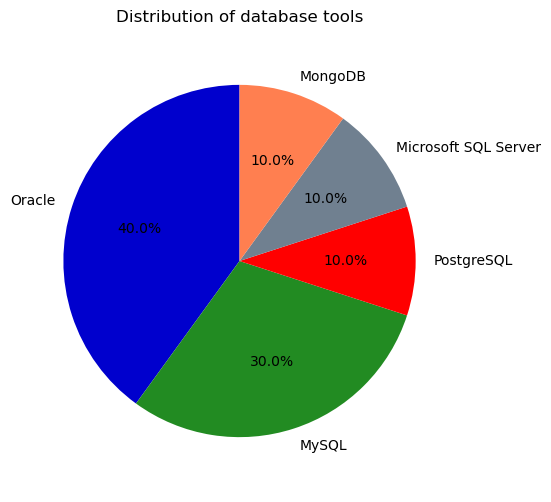

In [15]:
data_counts = df1['required-skills']['database'].str.split(', ', expand=True).stack().value_counts()
total_values = data_counts.sum()
percentages = data_counts / total_values * 100
# Plot the percentages and counts for each database tools
plt.figure(figsize=(5, 6))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=['mediumblue', 'forestgreen','red', 'slategray', 'coral'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of database tools')
plt.show()

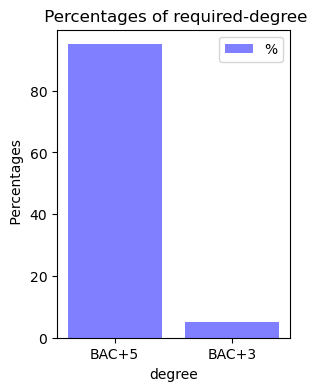

In [16]:
degree_counts = df1['required-skills']['degree'].str.split(', ', expand=True).stack().value_counts()
total_values = degree_counts.sum()
percentages = degree_counts / total_values * 100
# Plot the percentages and counts for each required degree
plt.figure(figsize=(3, 4))
plt.bar(percentages.index, percentages, color='blue', alpha=0.5, label='%')

plt.xlabel('degree')
plt.ylabel(' Percentages')
plt.title(' Percentages of required-degree')
plt.legend()
plt.show()

## Conclusion

This Jupyter Notebook project delved into the comprehensive analysis of the data analyst job market in Morocco, leveraging data extracted from the Indeed website. Through meticulous data scraping, cleaning, and visualization, we gained valuable insights into the prominent skills, technologies, and qualifications sought after by employers in the field of data analysis.

The exploration of job postings unveiled the significance of programming languages, data manipulation techniques, data visualization tools, and database technologies in the context of the Moroccan job market. By deciphering the prevailing trends and requirements, this analysis serves as a valuable resource for aspiring data analysts and industry professionals looking to navigate the job landscape in Morocco.

Despite the limitations in data scraping attempts, the findings presented in this notebook provide a robust foundation for understanding the dynamics of the data analyst job market and the evolving skill sets demanded by employers in Morocco.

We hope that this analysis serves as a valuable reference and contributes to a deeper understanding of the evolving landscape of data analysis in the Moroccan job market.

Thank you for exploring this notebook, and we encourage you to continue your data analysis journey with these insights in mind.

--- 
*Note: This analysis is based on data collected from a specific point in time and may not reflect real-time job market conditions. Further research and exploration are encouraged for a comprehensive understanding of the current job landscape.*